###Importing the Libraries

In [0]:
# Importing necessary libraries
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml import Pipeline
from pyspark.ml.evaluation import RegressionEvaluator
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder.appName("UsagePrediction").getOrCreate()


###Data Ingestion

In [0]:
# Load the data
file_path_fb = "dbfs:/FileStore/shared_uploads/ssiloju1@umbc.edu/main.csv"
df = spark.read.format("csv").option("header", "true").load(file_path_fb)

row_count = df.count()
print('Number of rows:', row_count)

df.display()


Number of rows: 780060


customer_id usage_type Day_1 Day_2 Day_3 Day_4 Day_5 Day_6 Day_7 Day_8 Day_9 Day_10 Day_11 Day_12 Day_13 Day_14 Day_15 Day_16 Day_17 Day_18 Day_19 Day_20 Day_21 Day_22 Day_23 Day_24 Day_25 Day_26 Day_27 Day_28 Day_29 Day_30 Day_31 Day_32 Day_33 Day_34 Day_35 Day_36 Day_37 Day_38 Day_39 Day_40 Day_41 Day_42 Day_43 Day_44 Day_45 Day_46 Day_47 Day_48 Day_49 Day_50 Day_51 Day_52 Day_53 Day_54 Day_55 Day_56 Day_57 Day_58 Day_59 Day_60 Day_61 Day_62 Day_63 Day_64 Day_65 Day_66 Day_67 Day_68 Day_69 Day_70 Day_71 Day_72 Day_73 Day_74 Day_75 Day_76 Day_77 Day_78 Day_79 Day_80 Day_81 Day_82 Day_83 Day_84 Day_85 Day_86 Day_87 Day_88 Day_89 Day_90 e9126f469646506b8e82b4214d075bf72d9d324d357650ba670ed6f6fbbf2a75 usage_app_other 53.0 130.73 7.86 67.71 153.38 35.92 128.6 30.61 37.29 86.45 0.0 77.17 0.0 64.13 122.66 27.82 0.0 10.13 18.9 0.0 0.0 0.0 41.38 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 e9126f469646506b8e82b4214d075bf72d9d324d357650ba670ed6f6fbbf2a75 usage_app_youtube_daily 98.5 0.0 284.82 150.05 0.0 261.89 44.89 0.0 0.0 0.0 0.0 0.0 23.67 0.0 0.0 0.0 0.0 96.61 38.97 0.0 91.72 0.0 55.94 47.41 0.0 0.0 0.0 0.0 279.93 0.0 0.0 0.0 158.66 0.0 114.93 0.0 0.0 147.77 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 15.63 0.0 0.0 112.44 17.05 0.0 53.57 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 52.27 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 50.28 0.0 e9126f469646506b8e82b4214d075bf72d9d324d357650ba670ed6f6fbbf2a75 usage_app_facebook_daily 79.42 72.61 72.15 82.82 61.06 57.91 55.59 56.46 50.07 47.65 34.87 43.82 30.76 23.7 20.36 21.03 25.0 27.88 18.49 24.19 11.8 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 e9126f469646506b8e82b4214d075bf72d9d324d357650ba670ed6f6fbbf2a75 usage_app_tiktok_daily 53.22 65.8 52.87 59.78 50.75 52.37 44.12 40.88 44.82 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 11.72 5.22 0.59 0.0 3.87 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 e9126f469646506b8e82b4214d075bf72d9d324d357650ba670ed6f6fbbf2a75 usage_app_whatsapp_daily 0.0 4.18 20.33 7.89 18.37 7.17 5.22 12.77 4.63 17.34 10.47 6.67 3.6 8.44 21.32 10.04 10.22 13.2 6.9 1.44 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.11 0.0 9.1 0.0 4.25 1.86 10.73 0.0 0.0 0.17 7.85 2.79 9.54 12.08 3.56 0.0 3.79 4.03 7.06 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 2.51 0.0 1.19 5.16 0.0 0.0 0.0 0.0 0.0 2.31 0.0 0.0 0.0 1.22 0.0 e9126f469646506b8e82b4214d075bf72d9d324d357650ba670ed6f6fbbf2a75 usage_app_helakuru_daily 25.92 12.67 0.0 32.72 1.56 26.49 0.0 17.72 0.0 63.31 16.17 8.13 0.0 15.67 0.91 9.4 0.0 4.21 0.0 25.42 15.78 0.0 53.73 0.0 16.81 31.74 22.77 0.0 0.0 0.0 23.95 0.0 22.75 0.0 5.85 24.06 0.0 0.0 0.0 5.67 0.0 1.38 0.0 0.0 15.63 0.0 13.08 0.0 0.0 4.06 5.58 4.67 0.0 0.0 1.48 0.0 0.0 0.0 0.0 11.03 0.0 0.0 16.69 0.0 9.84 0.0 2.98 0.0 19.75 4.73 33.22 0.0 0.0 2.58 0.0 0.0 0.0 0.0 0.0 7.65 8.41 0.0 1.63 17.21 5.22 0.0 19.59 22.63 0.0 29.62 e9126f469646506b8e82b4214d075bf72d9d324d357650ba670ed6f6fbbf2a75 usage_voice_d2d_outgoing 18.7 31.26 23.55 24.57 25.31 27.55 22.21 28.95 29.77 29.45 28.54 28.44 28.36 29.75 28.64 30.65 27.39 33.89 37.23 39.8 0.0 0.0 4.23 2.78 0.0 0.0 5.73 6.79 12.64 4.33 4.87 16.76 9.99 11.14 10.69 18.5 9.05 9.98 10.18 58.74 49.03 50.28 69.94 55.9 60.56 64.85 60.69 66.28 65.27 69.9 71.08 63.08 66.05 70.75 76.05 72.61 71

###Data Preprocessing

In [0]:
# Convert day columns to float
day_columns = [f"Day_{i}" for i in range(1, 91)]
for day_column in day_columns:
    df = df.withColumn(day_column, col(day_column).cast("float"))


###Distribution of the dataset based on the categories

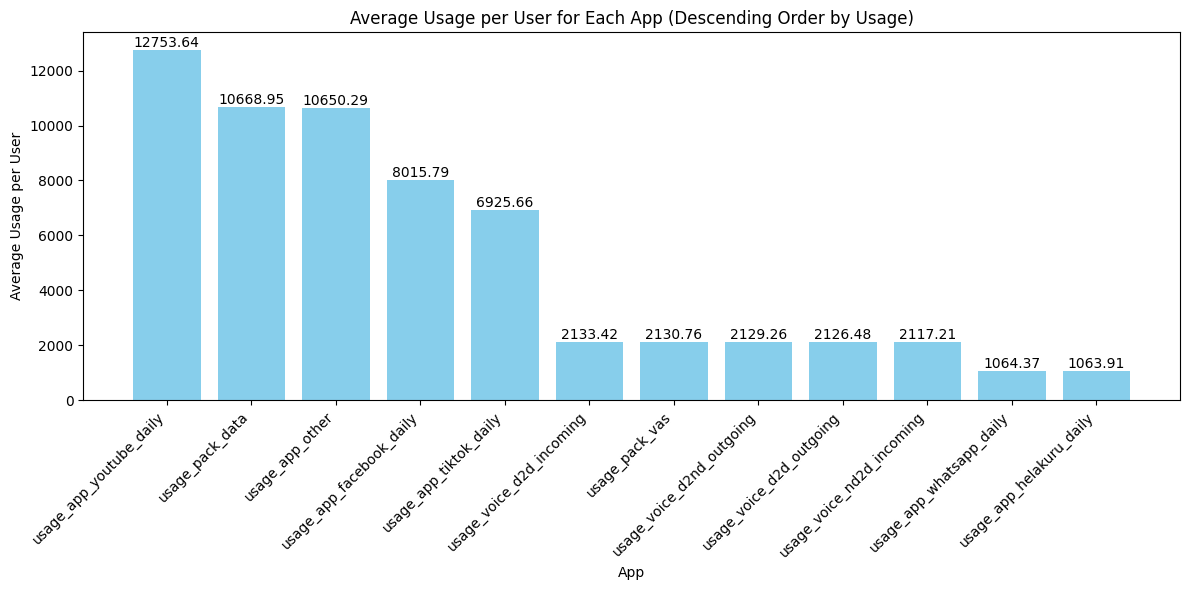

In [0]:
from pyspark.sql.functions import col, expr
from pyspark.sql.types import FloatType
import matplotlib.pyplot as plt

# Convert string columns to float
for day in range(1, 91):
    day_col = 'Day_{}'.format(day)
    merged_data = df.withColumn(day_col, col(day_col).cast(FloatType()))

# Select relevant columns for aggregation
columns_to_sum = ['Day_{}'.format(i) for i in range(1, 91)]

# Sum the usage over all days for each app
app_usage_totals = df.groupBy('usage_type') \
    .agg(expr("SUM(" + " + ".join(columns_to_sum) + ") AS total_usage"),
         expr("COUNT(DISTINCT customer_id) AS num_users"))

# Calculate average usage per user
app_usage_totals = app_usage_totals.withColumn("avg_usage_per_user", col("total_usage") / col("num_users"))

# Sort apps based on average usage (descending order)
sorted_apps = app_usage_totals.sort("avg_usage_per_user", ascending=False)

# Convert Spark DataFrame to Pandas for plotting
sorted_apps_pd = sorted_apps.toPandas()

# Visualize the average usage for each app in descending order
plt.figure(figsize=(12, 6))
bars = plt.bar(sorted_apps_pd['usage_type'], sorted_apps_pd['avg_usage_per_user'], color='skyblue')
plt.xlabel('App')
plt.ylabel('Average Usage per User')
plt.title('Average Usage per User for Each App (Descending Order by Usage)')
plt.xticks(rotation=45, ha='right')

# Annotate each bar with the average usage on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, round(yval, 2), ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [0]:
app_usage_totals.describe()

DataFrame[summary: string, usage_type: string, total_usage: string, num_users: string, avg_usage_per_user: string]

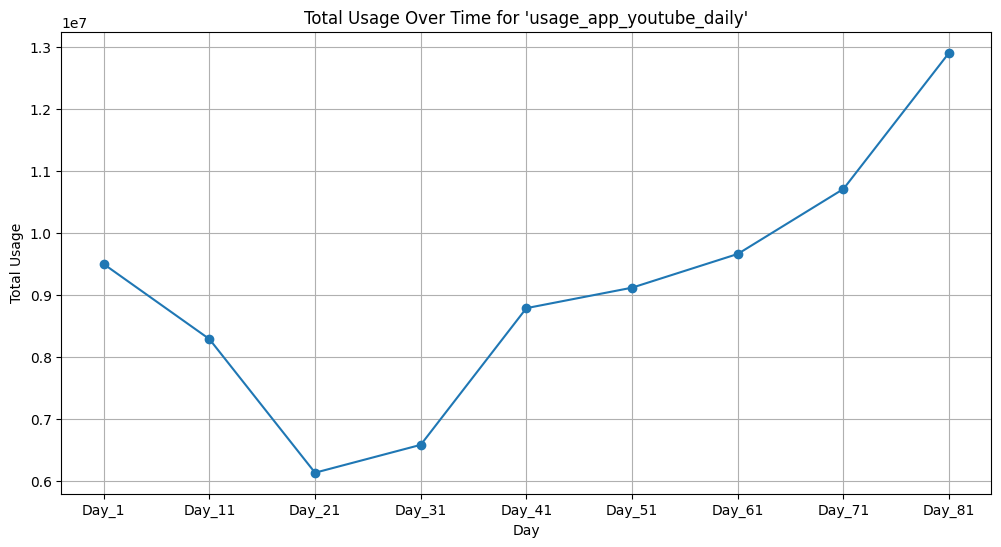

In [0]:
import matplotlib.pyplot as plt

# Filter the DataFrame for the desired usage_type
filtered_df = df.filter(df['usage_type'] == 'usage_app_youtube_daily')

day_indices = [1, 11, 21, 31, 41, 51, 61, 71, 81]
day_columns = [f"Day_{i}" for i in day_indices]

total_usage = filtered_df.select(day_columns).toPandas().sum(axis=0)

plt.figure(figsize=(12, 6))
plt.plot(total_usage.index, total_usage.values, marker='o', linestyle='-')
plt.xlabel("Day")
plt.ylabel("Total Usage")
plt.title(f"Total Usage Over Time for usage_app_youtube_daily")
plt.grid(True)  # Add grid lines
plt.show()


######Correlation matrix describing the number of users on daily basis

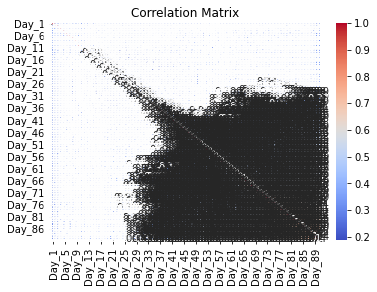

In [0]:
# Show correlation matrix to understand relationships between features
correlation_matrix = df.select(*day_columns).toPandas().corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [0]:
app_usage_totals.display()

usage_type total_usage num_users avg_usage_per_user usage_voice_d2d_outgoing 1.3823175242315674E8 65005 2126.4787696816666 usage_app_facebook_daily 5.2106668805914307E8 65005 8015.793985987894 usage_app_tiktok_daily 4.5020255571170044E8 65005 6925.6604216860305 usage_pack_data 6.935352274561157E8 65005 10668.952041475513 usage_app_youtube_daily 8.290504259089355E8 65005 12753.640887761489 usage_voice_nd2d_incoming 1.3762950825730896E8 65005 2117.2141874826393 usage_app_other 6.923222764196777E8 65005 10650.292691634148 usage_app_helakuru_daily 6.915921694338608E7 65005 1063.906114043321 usage_pack_vas 1.3851032313144684E8 65005 2130.7641432420096 usage_voice_d2d_incoming 1.3868266266024017E8 65005 2133.4153166716433 usage_app_whatsapp_daily 6.918927569695663E7 65005 1064.3685208361917 usage_voice_d2nd_outgoing 1.3841281666161728E8 65005 2129.2641590895664

######Plot for visualizing the average number of users for each application and their proportions

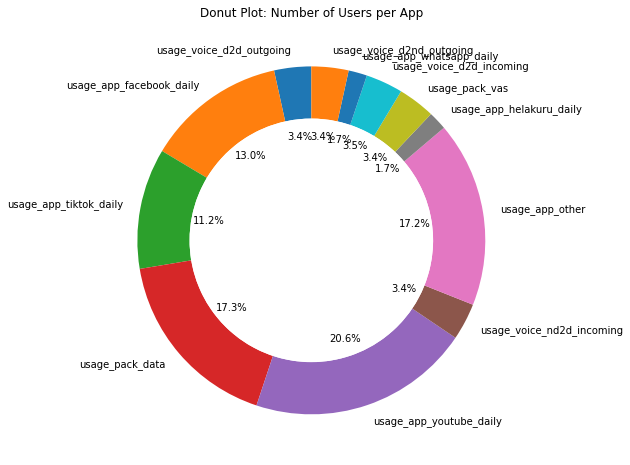

In [0]:
import matplotlib.pyplot as plt

# Extract data for donut plot
donut_data = app_usage_totals.toPandas()

# Plotting the donut plot
plt.figure(figsize=(8, 8))

# Create a pie chart
plt.pie(donut_data["avg_usage_per_user"], labels=donut_data["usage_type"], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.3))

# Draw a circle in the center to create a donut plot
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("Donut Plot: Number of Users per App")
plt.show()


###Increase in daily app usage

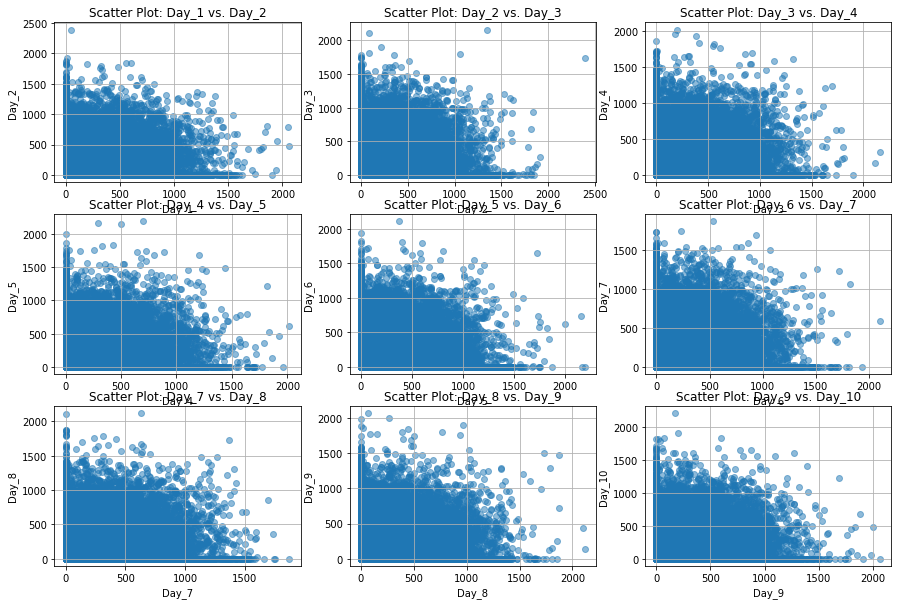

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
File <command-156932268990517>:6
      4 plt.figure(figsize=(15, 10))
      5 for i in range(len(day_columns) - 1):
----> 6     plt.subplot(3, 3, i + 1)
      7     plt.scatter(scatter_data[day_columns[i]], scatter_data[day_columns[i + 1]], alpha=0.5)
      8     plt.title(f"Scatter Plot: {day_columns[i]} vs. {day_columns[i + 1]}")

File /databricks/python/lib/python3.9/site-packages/matplotlib/pyplot.py:1268, in subplot(*args, **kwargs)
   1265 fig = gcf()
   1267 # First, search for an existing subplot with a matching spec.
-> 1268 key = SubplotSpec._from_subplot_args(fig, args)
   1270 for ax in fig.axes:
   1271     # if we found an axes at the position sort out if we can re-use it
   1272     if hasattr(ax, 'get_subplotspec') and ax.get_subplotspec() == key:
   1273         # if the user passed no kwargs, re-use

File /databricks/p

In [0]:
scatter_data = df.select(*day_columns).toPandas()

# Create scatter plots for the increase in daily app usage
plt.figure(figsize=(15, 10))
for i in range(len(day_columns) - 1):
    plt.subplot(3, 3, i + 1)
    plt.scatter(scatter_data[day_columns[i]], scatter_data[day_columns[i + 1]], alpha=0.5)
    plt.title(f"Scatter Plot: {day_columns[i]} vs. {day_columns[i + 1]}")
    plt.xlabel(day_columns[i])
    plt.ylabel(day_columns[i + 1])
    plt.grid(True)

# Adjust layout
plt.show()

###Data Transformation

In [0]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml import Pipeline

# Assuming 'usage_type' is a categorical feature that needs one-hot encoding
categorical_cols = ['usage_type']

# Convert string labels into indices
indexers = [StringIndexer(inputCol=col, outputCol=f"{col}_index", handleInvalid="skip") for col in categorical_cols]

# One-hot encode categorical features only if the encoded column does not exist
encoder_stages = [
    OneHotEncoder(inputCol=f"{col}_index", outputCol=f"{col}_encoded", dropLast=False) 
    for col in categorical_cols 
    if f"{col}_encoded" not in df.columns
]

# Combine indexers and encoders into a single pipeline
pipeline = Pipeline(stages=indexers + encoder_stages)

# Fit and transform the pipeline
df = pipeline.fit(df).transform(df)


In [0]:
from pyspark.ml.feature import VectorAssembler

# Specify your feature columns
feature_cols = [f"Day_{i}" for i in range(1, 91)]

# Assemble features into a single vector
assembler = VectorAssembler(inputCols=feature_cols + [f"{col}_encoded" for col in categorical_cols],
                            outputCol="features")

# Transform the DataFrame
df = assembler.transform(df)


####Training and Testing Dataset

In [0]:
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.regression import LinearRegression

# Specify the label column (replace 'Day_1' with the desired day column)
label_col = 'Day_90'

# Split the data into training and testing sets
(training_data, testing_data) = df.randomSplit([0.8, 0.2], seed=42)

###Modelling

In [0]:

lr = LinearRegression(featuresCol="features", labelCol=label_col)

# Specify the parameter grid for hyperparameter tuning if needed
param_grid = ParamGridBuilder().build()

# Create a CrossValidator with RegressionEvaluator
evaluator = RegressionEvaluator(labelCol=label_col, metricName="rmse")
cv = CrossValidator(estimator=lr, estimatorParamMaps=param_grid, evaluator=evaluator, numFolds=3)

####Cross Validation

In [0]:
# Fit the model to the training data
model = cv.fit(training_data)

###Metric Analysis

In [0]:
# Make predictions on the testing data
predictions = model.transform(testing_data)

# Evaluate the model
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE) for {label_col}: {rmse}")

Root Mean Squared Error (RMSE) for Day_90: 4.604586482798192e-06
